# Step Attenuator
## Example E11 from NIST 1900

Reference: NIST Technical Note 1900 (http://dx.doi.org/10.6028/NIST.TN.1900)

This example has multiple input variables with different distributions, including normal, uniform, t, and arcsine.

In [1]:
%matplotlib inline
import suncal

In [2]:
u = suncal.UncertCalc.from_configfile('../ex_stepatten.yaml')
u.get_reqd_inputs()  # What are the variables in the function?

['dL0b', 'dLm', 'dLia', 'dLs', 'dLd', 'dLk', 'dL0a', 'Ls', 'dLib']

In [3]:
u.calculate()

$Lx = Ls - dL0a + dL0b + dLd - dLia + dLib + dLk + dLm + dLs$


Method             | Mean      | Standard Uncertainty  
------------------|---------|----------------------
GUM Approximation  | 30.043   | 0.022               
Monte Carlo        | 30.043   | 0.022

In [4]:
# Compare to Exhibit 16. Note NIST gives all values in STANDARD uncertainties. But input
# file defines them using shape parameters (width of uniform, etc.). Can check the
# conversions here.
u.out.report_inputs()

Variable   | Mean      | Std. Uncertainty   | Deg. Freedom   | Description  
----------|---------|------------------|--------------|-------------
$Ls$   | 30.0402   | 0.0091            | 3.0       | --           
$dLs$   | 0.0030   | 0.0025            | inf       | --           
$dLib$   | 0.0   | 0.00030            | inf       | --           
$dL0a$   | 0.0   | 0.0020           | inf      | --           
$dL0b$   | 0.0  | 0.0020           | inf      | --           
$dLm$   | 0.0  | 0.020           | inf      | --           
$dLd$   | 0.0  | 0.0014           | inf      | --           
$dLia$   | 0.0  | 0.00030           | inf      | --           
$dLk$   | 0.0  | 0.0021           | inf      | --

In [5]:
u.out.report_expanded(conflist=[.68, .95])

### GUM Approximation


Interval   | Min       | Max       | k         | Deg. Freedom   | Expanded Uncertainty  
----------|---------|---------|---------|--------------|----------------------
99.00%     | 29.984   | 30.102   | 2.621     | 110.94         | 0.059               
95.00%     | 29.999   | 30.088   | 1.982     | 110.94         | 0.044               
90.00%     | 30.006   | 30.080   | 1.659     | 110.94         | 0.037               
68.00%     | 30.021   | 30.066  | 0.999     | 110.94         | 0.022              


### Monte Carlo

Symmetric Coverage Intervals

Interval   | Min       | Max       | k        
----------|---------|---------|---------
99.00%     | 29.995   | 30.091   | 2.142    
95.00%     | 30.006   | 30.081   | 1.668    
90.00%     | 30.010   | 30.077   | 1.485    
68.00%     | 30.019   | 30.068   | 1.095

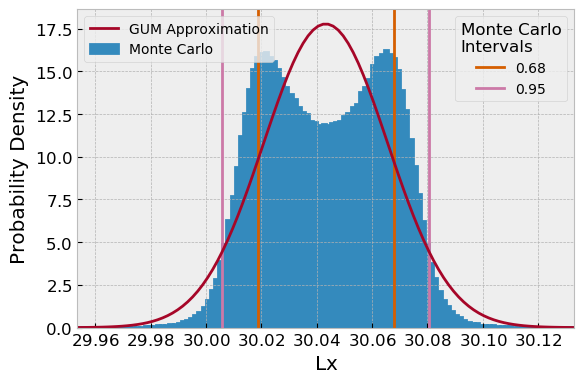

In [6]:
# Compare to Exhibit 17
u.out.plot_pdf(intervals=[.68, .95]);